In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("Advertising.csv")

In [5]:
X = df.drop('sales',axis=1)
y = df['sales']

In [6]:
from sklearn.preprocessing import PolynomialFeatures

In [8]:
polynomial_converter = PolynomialFeatures(degree=2,include_bias=False)

In [9]:
poly_features = polynomial_converter.fit_transform(X)

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)

In [12]:
from sklearn.linear_model import LinearRegression

In [13]:
model = LinearRegression(fit_intercept=True)

In [14]:
model.fit(X_train,y_train)

LinearRegression()

In [15]:
test_predictions = model.predict(X_test)

In [16]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [17]:
MAE = mean_absolute_error(y_test,test_predictions)
MSE = mean_squared_error(y_test,test_predictions)
RMSE = np.sqrt(MSE)

In [18]:
train_rmse_errors = []

test_rmse_errors = []

for d in range(1,10):
    
  
    polynomial_converter = PolynomialFeatures(degree=d,include_bias=False)
    poly_features = polynomial_converter.fit_transform(X)
    

    X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)
    

    model = LinearRegression(fit_intercept=True)
    model.fit(X_train,y_train)
    
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)
    
    train_RMSE = np.sqrt(mean_squared_error(y_train,train_pred))
    
    test_RMSE = np.sqrt(mean_squared_error(y_test,test_pred))
       
    train_rmse_errors.append(train_RMSE)
    test_rmse_errors.append(test_RMSE)

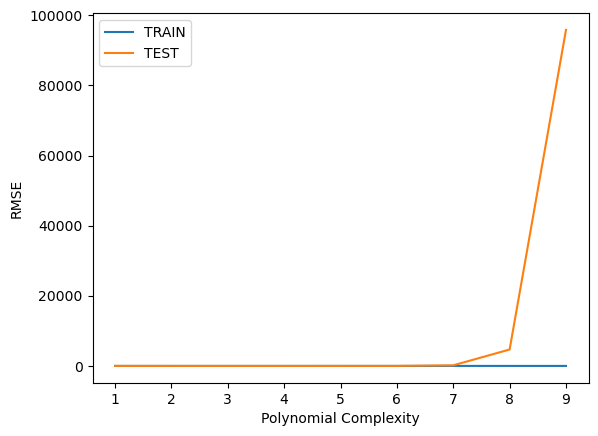

In [20]:
plt.plot(range(1,10),train_rmse_errors,label='TRAIN')
plt.plot(range(1,10),test_rmse_errors,label='TEST')
plt.xlabel("Polynomial Complexity")
plt.ylabel("RMSE")
plt.legend()